# MLB Metrics Helpers Examples

Example uses for helper functions in mlb_metrics_helpers.py

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import mlb_metrics_helpers

import warnings
warnings.filterwarnings("ignore")

### Create scatter plot of pitch locations, colored by pitch type

In [2]:
# get pitcher data
mikolaus_id = mlb_metrics_helpers.player_id("Mikolas", "Miles")
mikolaus_general_stats = mlb_metrics_helpers.player_general_metrics(
    mikolaus_id, timeline_type="career"
)
mikolaus_timeline = mlb_metrics_helpers.parse_career_timeline(mikolaus_general_stats)
mikolaus_specific_stats = mlb_metrics_helpers.player_specific_metrics(
    mikolaus_id,
    metric_type="pitching",
    start_dt=mikolaus_timeline[0],
    end_dt=mikolaus_timeline[1],
)

mikolaus_specific_stats

Gathering player lookup table. This may take a moment.
Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2018-05-04,94.2,-2.45,6.51,"Mikolas, Miles",592178,571945,double,hit_into_play,...,3,0,3,0,3,Standard,Standard,202.0,-0.053,0.718
1,CU,2018-05-04,78.3,-2.27,6.45,"Mikolas, Miles",592178,571945,NaN,called_strike,...,3,0,3,0,3,Standard,Standard,34.0,0.000,-0.051
2,SL,2018-05-04,86.3,-2.46,6.63,"Mikolas, Miles",592178,571945,NaN,called_strike,...,3,0,3,0,3,Standard,Standard,153.0,0.000,-0.036
3,SI,2018-05-04,93.2,-1.97,6.52,"Mikolas, Miles",450314,571945,field_out,hit_into_play,...,3,0,3,0,3,Standard,Standard,235.0,0.020,-0.255
4,CU,2018-05-04,77.5,-2.25,6.45,"Mikolas, Miles",450314,571945,NaN,ball,...,3,0,3,0,3,Standard,Standard,33.0,0.000,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,CU,2018-05-10,80.5,-2.14,6.54,"Mikolas, Miles",608671,571945,NaN,ball,...,1,1,0,0,1,Standard,Standard,28.0,0.000,0.043
13016,CU,2018-05-10,79.1,-2.12,6.42,"Mikolas, Miles",608671,571945,NaN,foul,...,1,1,0,0,1,Strategic,Standard,31.0,0.000,0.000
13017,FF,2018-05-10,97.1,-1.91,6.53,"Mikolas, Miles",608671,571945,NaN,ball,...,1,1,0,0,1,Standard,Standard,209.0,0.000,0.023
13018,FF,2018-05-10,94.4,-2.18,6.61,"Mikolas, Miles",608671,571945,NaN,foul_bunt,...,1,1,0,0,1,Standard,Standard,201.0,0.000,-0.051


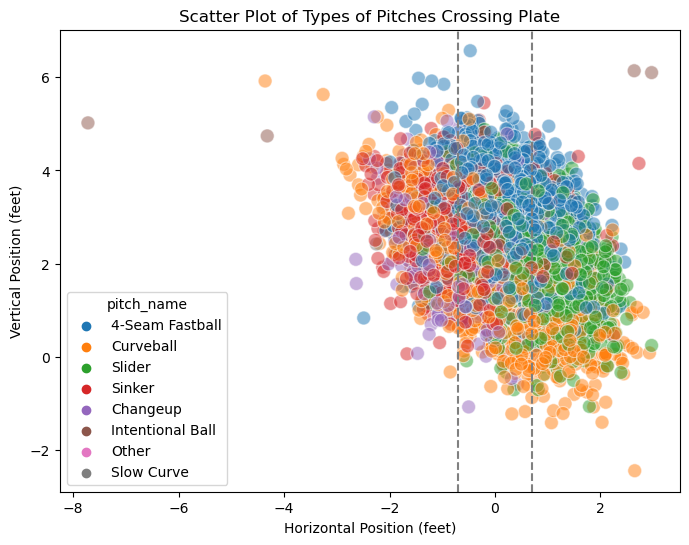

In [3]:
scatter = mlb_metrics_helpers.plate_crossing_scatter(mikolaus_specific_stats, "pitching")
scatter.show()

### Create various machine learning models for classifying outcome of pitch (pitch zone)

In [4]:
mikolaus_model_data = mlb_metrics_helpers.pitcher_model_data(mikolaus_specific_stats)
mikolaus_model_data

,pitch_type,release_speed,release_pos_x,release_pos_y,release_spin_rate,spin_axis,p_throws,vx0,vy0,vz0,ax,ay,az,zone
0,FF,94.2,-2.45,54.55,2319.0,202.0,R,9.733690,-136.547039,-8.347547,-8.977545,29.991442,-13.601673,14.0
1,CU,78.3,-2.27,55.67,2757.0,34.0,R,3.213866,-113.685528,0.330972,6.686118,23.277507,-43.409795,5.0
2,SL,86.3,-2.46,54.72,2371.0,153.0,R,5.640100,-125.479792,-4.522315,2.195190,23.817224,-25.240157,5.0
3,SI,93.2,-1.97,54.09,2351.0,235.0,R,7.685924,-135.392311,-7.774589,-18.646288,30.631840,-18.774989,8.0
4,CU,77.5,-2.25,55.18,2640.0,33.0,R,1.014720,-112.477903,2.890067,6.294862,22.392686,-43.087035,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,CU,80.5,-2.14,55.44,2600.0,28.0,R,5.529310,-116.837519,-5.378493,4.665743,23.929388,-42.397880,14.0
13016,CU,79.1,-2.12,54.36,2558.0,31.0,R,0.761371,-115.012096,0.239371,6.480165,24.726793,-43.542036,13.0
13017,FF,97.1,-1.91,54.09,2253.0,209.0,R,9.395963,-140.900648,-8.466190,-9.829562,31.611886,-16.812228,14.0
13018,FF,94.4,-2.18,54.32,2161.0,201.0,R,6.675660,-137.256735,-6.066099,-8.243672,30.168799,-13.864550,2.0


In [5]:
sklearn_model_types = ["logistic_regression", "random_forest", "gradient_boosting", "hist_gradient_boosting"]
for model_type in sklearn_model_types:
    model, accuracy = mlb_metrics_helpers.tested_model(mikolaus_model_data, "zone", model_type)
    print(f"{model_type} accuracy: {accuracy}")
    
    

logistic_regression accuracy: 0.7368421052631579
random_forest accuracy: 0.6932330827067669
gradient_boosting accuracy: 0.6699248120300751
hist_gradient_boosting accuracy: 0.718796992481203


In [6]:
random_row = mikolaus_model_data.sample(n=1, random_state=0)
random_row_features = random_row.drop(columns=["zone"])
random_row_target = random_row["zone"]

prediction, prediction_probas = mlb_metrics_helpers.model_prediction(model, random_row_features)
print(f"Correct zone: {random_row_target.values[0]}")
print(f"Prediction: {prediction}")
print(f"Prediction probas: {prediction_probas}")

Correct zone: 4.0
Prediction: 4.0
Prediction probas: [0.0008198147139564081, 0.009053017037155282, 0.00020814096732765672, 0.9034702057458447, 0.07367168237426246, 0.00029051593708550954, 0.00027222741992500297, 0.008587308856748199, 0.000922614378389453, 0.0005250958714183265, 0.00017990771328061888, 0.0012334158614797101, 0.0007660531231265928]


### Create scatter plot of pitched balls, colored by batting event

In [7]:
# get batter data
judge_id = mlb_metrics_helpers.player_id("Judge", "Aaron")
judge_general_stats = mlb_metrics_helpers.player_general_metrics(judge_id, timeline_type="career")
judge_timeline = mlb_metrics_helpers.parse_career_timeline(judge_general_stats)
judge_specific_stats = mlb_metrics_helpers.player_specific_metrics(
    judge_id,
    metric_type="batting",
    start_dt=judge_timeline[0],
    end_dt=judge_timeline[1],
)

judge_specific_stats

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CU,2022-08-12,77.0,-2.27,5.63,"Judge, Aaron",592450,543135,strikeout,swinging_strike,...,1,2,1,2,1,Standard,Standard,41.0,0.023,-0.195
1,CU,2022-08-12,76.8,-2.09,5.59,"Judge, Aaron",592450,543135,NaN,ball,...,1,2,1,2,1,Standard,Standard,47.0,0.000,0.037
2,FC,2022-08-12,89.3,-2.27,5.43,"Judge, Aaron",592450,543135,NaN,ball,...,1,2,1,2,1,Standard,Standard,187.0,0.000,0.017
3,FS,2022-08-12,86.5,-2.38,5.41,"Judge, Aaron",592450,543135,NaN,swinging_strike,...,1,2,1,2,1,Standard,Standard,238.0,0.000,-0.046
4,FF,2022-08-12,92.9,-2.36,5.40,"Judge, Aaron",592450,543135,NaN,called_strike,...,1,2,1,2,1,Standard,Standard,223.0,0.000,-0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,SI,2022-08-13,92.5,-2.87,3.85,"Judge, Aaron",592450,670167,NaN,foul,...,2,2,2,2,2,Standard,Standard,267.0,0.000,-0.042
3129,SL,2022-08-13,86.8,-2.23,5.86,"Judge, Aaron",592450,676710,NaN,ball,...,0,0,0,0,0,Infield shift,Standard,110.0,0.000,0.016
3130,SL,2022-08-13,83.1,-3.15,3.78,"Judge, Aaron",592450,670167,NaN,ball,...,2,2,2,2,2,Standard,Standard,74.0,0.000,0.044
3131,FF,2022-08-13,96.1,-1.98,5.96,"Judge, Aaron",592450,676710,NaN,called_strike,...,0,0,0,0,0,Infield shift,Standard,210.0,0.000,-0.024


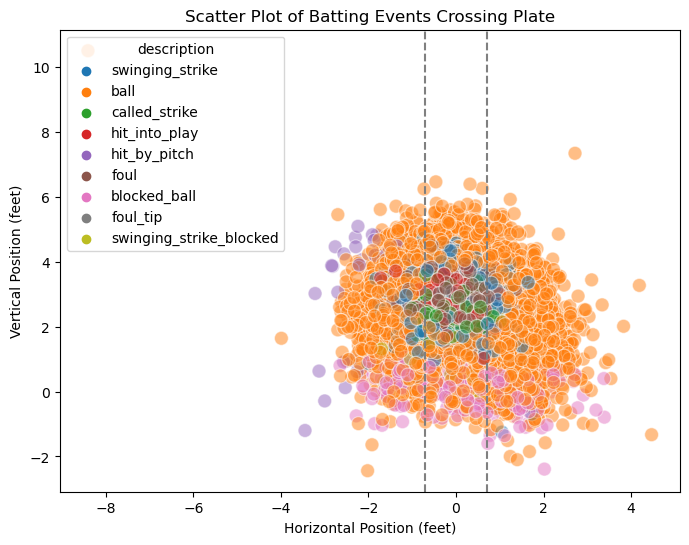

In [8]:
scatter = mlb_metrics_helpers.plate_crossing_scatter(judge_specific_stats, "batting")
scatter.show()

### Create various machine learning models for classifying outcome of swinging bat play (strike or hit into play)

In [9]:
judge_model_data = mlb_metrics_helpers.batter_model_data(judge_specific_stats)
judge_model_data

,pitch_type,release_speed,release_pos_x,release_pos_y,release_spin_rate,spin_axis,p_throws,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,description
0,CU,77.0,-2.27,53.95,2070.0,41.0,R,0.82,1.44,5.213895,-111.910639,0.021591,5.075797,23.467290,-40.612124,swinging_strike
3,FS,86.5,-2.38,53.66,1670.0,238.0,R,0.04,1.70,7.816156,-125.822604,-3.344875,-11.776428,21.458979,-28.657600,swinging_strike
5,FF,93.0,-2.42,53.89,2269.0,233.0,R,-0.55,3.76,7.629651,-135.143926,-0.724825,-17.391617,32.104993,-18.524160,hit_into_play
35,SL,87.2,2.31,54.11,2082.0,170.0,L,0.09,2.22,-4.918468,-126.938963,-4.427371,-1.348054,24.203796,-25.082623,hit_into_play
37,FF,94.0,2.33,54.09,2240.0,150.0,L,-0.28,3.72,-8.081169,-136.675580,-4.124875,8.997411,27.747059,-13.121643,swinging_strike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,SL,84.8,-1.81,53.44,2078.0,49.0,R,0.61,1.46,5.207271,-123.467787,-2.670338,1.731825,22.857826,-33.399100,swinging_strike
3108,FF,94.1,-1.29,53.76,2208.0,205.0,R,0.50,1.99,6.105346,-136.665543,-9.777313,-9.394336,30.134973,-10.538146,hit_into_play
3114,FF,95.6,-1.88,54.19,2611.0,212.0,R,-0.21,1.72,6.719506,-138.815237,-9.266855,-14.793779,29.907845,-8.027452,hit_into_play
3117,KC,79.8,-1.84,54.62,2334.0,29.0,R,-0.52,2.02,1.817991,-116.170745,0.326995,4.686705,24.469374,-44.671598,swinging_strike


In [10]:
sklearn_model_types = ["logistic_regression", "random_forest", "gradient_boosting", "hist_gradient_boosting"]
for model_type in sklearn_model_types:
    model, accuracy = mlb_metrics_helpers.tested_model(judge_model_data, "description", model_type)
    print(f"{model_type} accuracy: {accuracy}")

logistic_regression accuracy: 0.6416861826697893
random_forest accuracy: 0.765807962529274
gradient_boosting accuracy: 0.7704918032786885
hist_gradient_boosting accuracy: 0.7681498829039812


In [11]:
random_row = judge_model_data.sample(n=1, random_state=0)
random_row_features = random_row.drop(columns=["description"])
random_row_target = random_row["description"]

prediction, prediction_probas = mlb_metrics_helpers.model_prediction(model, random_row_features)
print(f"Correct Description: {random_row_target.values[0]}")
print(f"Prediction: {prediction}")
print(f"Prediction probas: {prediction_probas}")

Correct Description: swinging_strike
Prediction: swinging_strike
Prediction probas: [0.05024705223936721, 0.9497529477606328]
